In [155]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # Matlab-style plotting

### `Decision Trees`


`Decision trees` are a popular and powerful machine learning algorithm<br>
 that can be used for both **classification** and **regression tasks**.<br> 
 A `decision tree` is a tree-like model of decisions and their possible consequences.<br>
It works by *recursively partitioning the training data into smaller and smaller subsets*,<br>
based on the values of the features, until the subsets are as pure as possible,<br>
meaning they contain only one class or a single value for the target variable.

## `How Decision Trees Work?`

Suppose we have a dataset of patients with information about their *age*,*gender*, *blood pressure*,<br>
 and whether they have `heart disease` or `not`.<br> Here is a sample of the data:

| Age | Gender | Blood Pressure | Heart Disease |
|-----|--------|----------------|---------------|
| 45  | Male   | High           | Yes           |
| 60  | Female | Normal         | No            |
| 35  | Male   | Normal         | No            |
| 50  | Female | Low            | Yes           |
| 70  | Male   | High           | Yes           |
| 55  | Female | High           | Yes           |

In [156]:
data = pd.DataFrame(
    {"Age":[45,60,35,50,70,55], 
      "Gender":["M","F","M","F","M" ,"F"],
      "Blood Pressure":["High","Normal","Normal","Low","High","High"],
      "Heart Disease":["Yes","No","No","Yes","Yes","Yes"] ,    
     }
)
data

,Age,Gender,Blood Pressure,Heart Disease
0,45,M,High,Yes
1,60,F,Normal,No
2,35,M,Normal,No
3,50,F,Low,Yes
4,70,M,High,Yes
5,55,F,High,Yes


### 1 - Select the best feature

![image](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

In [157]:
# First We Need to Calcualte the Entropy of the Data Set
# Entropy is the measure of randomness in the data set

''' formula for entropy is 
    Entropy = -p(+)log2(p(+)) - p(-)log2(p(-))'''
'''For Our Data Label is Heart Disease'''
p_y = data[ data['Heart Disease'] == 'Yes'].shape[0] / data.shape[0]
p_n = data[ data['Heart Disease'] == 'No'].shape[0] / data.shape[0]  # or p_n = 1 - p_y
entropy = -p_y * np.log2(p_y) - p_n * np.log2(p_n)
print("Entropy of the Data Set is: ", entropy)

Entropy of the Data Set is:  0.9182958340544896


In [158]:
'''Second  We Need to Select the Best Feature to Split the Data Set 
    Based on the Information Gain'''
'''Information Gain is the difference between the Entropy of the Data Set'''
'''Information Gain = Entropy of the Data Set - Entropy of the Feature'''

'''we have 3 Features'''
# 1. Age
# 2. Gender 
# 3. Blood Pressure


'''Information Gain for Age'''
'''First we need to calculate the Entropy of the Feature Age'''
'''For Age we have 6 Values 35, 45, 50, 55, 60, 70'''
'''For Subset Yes we have 4 Values 45, 50, 55, 70'''
'''For Subset No we have 2 Values 35, 60'''
'''Entropy of the Feature Age = -p(+)log2(p(+)) - p(-)log2(p(-))'''
'''we will Split age according to < 50 and >= 50'''

'''Entropy of the Feature Age < 50''' 
p_y_age_lt_50 = data[ (data['Age'] < 50) & (data['Heart Disease'] == 'Yes')].shape[0] / data[ data['Age'] < 50].shape[0]
p_n_age_lt_50 = data[ (data['Age'] < 50) & (data['Heart Disease'] == 'No')].shape[0] / data[ data['Age'] < 50].shape[0]
entropy_age_lt_50 = -p_y_age_lt_50 * np.log2(p_y_age_lt_50) - p_n_age_lt_50 * np.log2(p_n_age_lt_50)
print("Entropy of the Feature Age < 50 is: ", entropy_age_lt_50,"And  P(+) is: ", p_y_age_lt_50, "And P(-) is: ", p_n_age_lt_50)
p_y_age_gte_50 = data[ (data['Age'] >= 50) & (data['Heart Disease'] == 'Yes')].shape[0] / data[ data['Age'] >= 50].shape[0]
p_n_age_gte_50 = data[ (data['Age'] >= 50) & (data['Heart Disease'] == 'No')].shape[0] / data[ data['Age'] >= 50].shape[0]
print("Entropy of the Feature Age >= 50 is: ", entropy_age_lt_50,"And  P(+) is: ", p_y_age_gte_50, "And P(-) is: ", p_n_age_gte_50)
entropy_age = (data[ data['Age'] < 50].shape[0] / data.shape[0]) * entropy_age_lt_50 \
+ (data[ data['Age'] >= 50].shape[0] / data.shape[0]) * entropy_age_lt_50
print("Entropy of the Feature Age is: ", entropy_age)
infromation_gain_age = np.abs(entropy - entropy_age)
print("Information Gain for Age is: ", infromation_gain_age)


Entropy of the Feature Age < 50 is:  1.0 And  P(+) is:  0.5 And P(-) is:  0.5
Entropy of the Feature Age >= 50 is:  1.0 And  P(+) is:  0.75 And P(-) is:  0.25
Entropy of the Feature Age is:  1.0
Information Gain for Age is:  0.08170416594551044


In [167]:
''' We will do the same for the other Features'''
''' Suppose We Infromation Gain for Age is the Highest'''
''' We will Split the Data Set According to Age < 50 and Age >= 50'''


''' After Splitting the Data Set we will do the same for the Subsets'''
''' Tree will be like this: 
''' 

' Tree will be like this: \n'

                    age <= 50?
                    /         \
           blood pressure=High   no heart disease
              /         \
        heart disease    gender=Male?
                        /         \
            no heart disease   heart disease

#### Native Code

In [ ]:
from collections import Counter

def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    ent = 0
    for count in counts.values():
        p = count / total
        ent -= p * math.log(p, 2)
    return ent

def information_gain(left, right, total_entropy):
    p_left = len(left) / len(total_entropy)
    p_right = len(right) / len(total_entropy)
    return total_entropy - p_left * entropy(left) - p_right * entropy(right)

def get_split(data):
    total_entropy = entropy([row[-1] for row in data])
    best_gain = 0
    best_split = None
    for index in range(len(data[0]) - 1):
        left = [row for row in data if row[index] == 0] 
        right = [row for row in data if row[index] == 1]
        gain = information_gain(left, right, total_entropy)
        if gain > best_gain:
            best_gain = gain
            best_split = (index, 1)
    return best_split  

# Train 
def train_tree(data, max_depth):
    # Base case
    if len(set(row[-1] for row in data)) == 1 or max_depth == 0:
        return Counter(row[-1] for row in data).most_common(1)[0][0]
    
    # Get split 
    index, value = get_split(data)
    
    # Split
    left = [row for row in data if row[index] == value]
    right = [row for row in data if row[index] != value]

    # Recurse
    left_tree = train_tree(left, max_depth - 1)
    right_tree = train_tree(right, max_depth - 1)

    # Make a tree node
    tree = {index: {value: left_tree, "not " + str(value): right_tree}}
    return tree

# Make predictions
def predict(tree, input):
    # Get the root node
    index = list(tree.keys())[0]
    value = input[index]
    
    # Traverse to leaf node
    if isinstance(tree[index][value], dict):
        return predict(tree[index][value], input)
    else:
        return tree[index][value]

### Sklearn 

In [168]:
#dataset
from sklearn.datasets import load_iris
#sklearn
from sklearn.tree import DecisionTreeClassifier 
#splitting data
from sklearn.model_selection import train_test_split 

iris = load_iris() # load the iris dataset

X = iris.data # 4 features
y = iris.target # 0, 1, 2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 80% training and 20% test

In [169]:
clf = DecisionTreeClassifier() # Create Decision Tree classifer object
''' Default Criterion is Gini Index '''
'''Gini(S) = 1 - Σ (pi)^2'''
''' if u want to use Entropy as a Criterion use this: 
clf = DecisionTreeClassifier(criterion='entropy')'''
''' Good Source to Understand the Difference Between Gini Index and Entropy in References Section'''

clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer

y_pred = clf.predict(X_test) #Predict the response for test dataset

In [170]:
from sklearn import metrics # Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Text(0.512, 0.88, 'Gini Index')

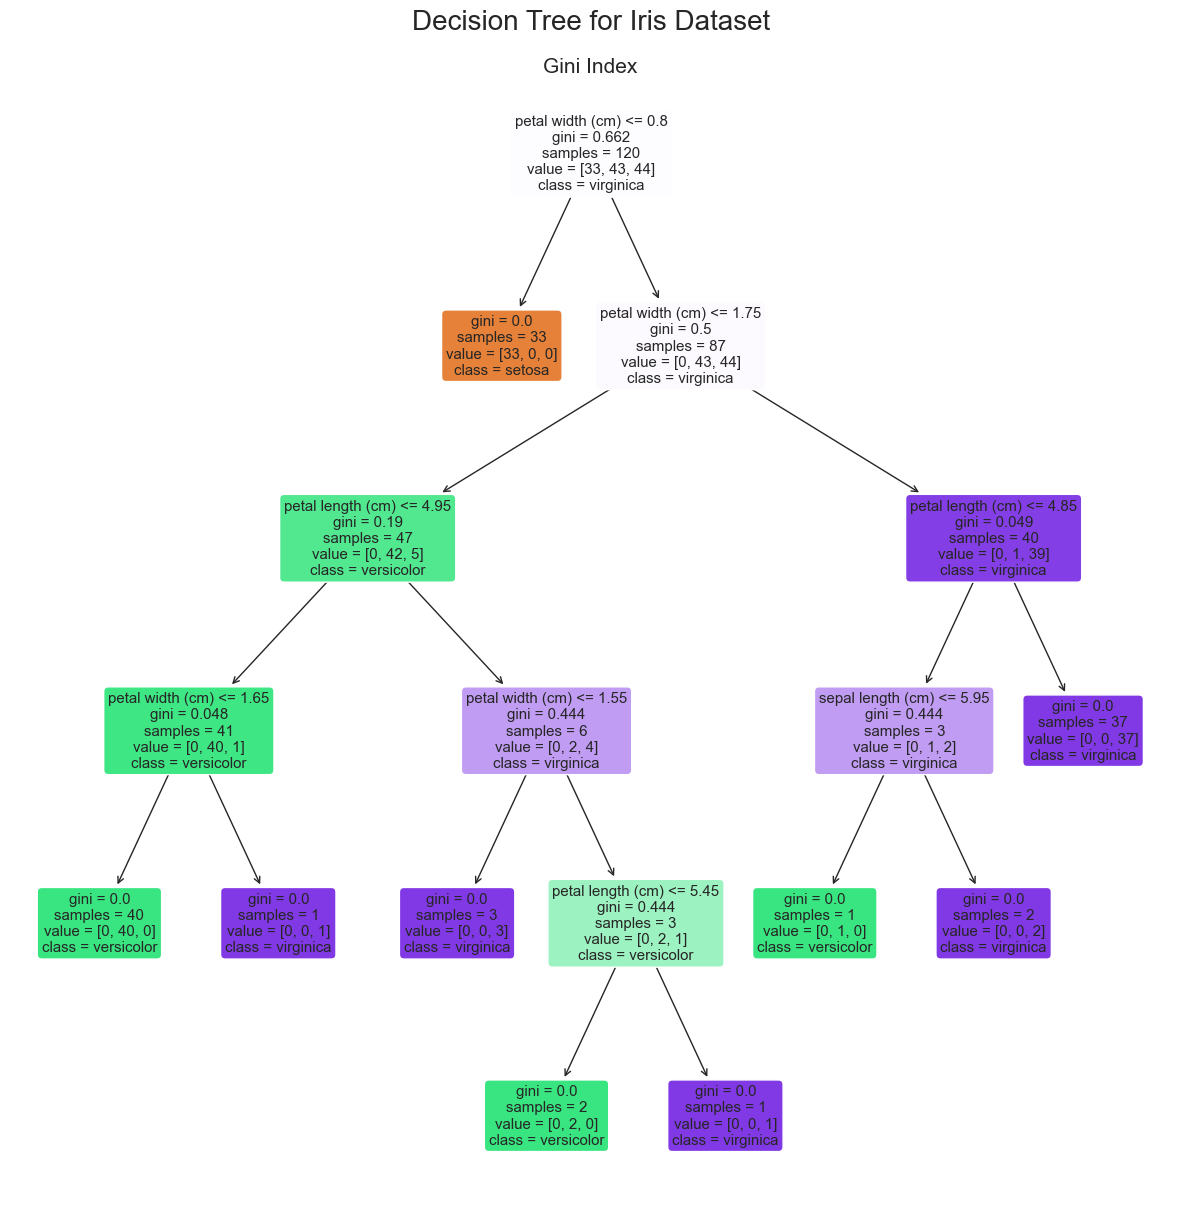

In [187]:
#plot decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, rounded=True, class_names=iris.target_names, feature_names=iris.feature_names)
plt.title('Decision Tree for Iris Dataset', fontsize=20 , pad=20)
plt.suptitle("Gini Index", fontsize=15 ,y= .88, x = 0.512)

### ` Pros & Cons `

#### `Pros`

  - Decision trees are easy to understand and interpret.<br>
    The model's decisions can be visualized and explained easily,<br>
    making it useful for both technical and non-technical audiences.
  - Decision trees can handle both numerical and categorical data,<br>
    making it versatile for various types of datasets.
  - Decision trees can handle missing values and outliers,<br>
   reducing the need for data preprocessing.
  - Decision trees provide a measure of feature importance,<br>
   which can help in feature selection and understanding the data.
  - Decision trees are fast and efficient at making predictions once the model is trained.<br>
 --- 
#### `Cons`

  - Decision trees can be prone to overfitting,<br>
    especially when they are too complex or when the training data is noisy or imbalanced.
  - Decision trees may not perform well when the relationship between <br>the features and the target variable is not linear.
  - Decision trees are sensitive to small changes in the data,<br> which can lead to different tree structures.
  - Decision trees may not be the best choice for very large datasets,<br> as they can be computationally expensive and time-consuming to train.
  - Decision trees may not generalize well to new data,<br> especially if the training data is not representative of the population.

### `Note`
The `Gini index` has a maximum *impurity* is **0.5** and maximum *purity* is **0**,<br> 
whereas `Entropy` has a maximum *impurity* of **1** and maximum *purity* is **0** .

![](https://quantdare.com/wp-content/uploads/2020/11/entropy_and_gini.png)

---
### `Rferances`

- [Sklearn Docs](https://scikit-learn.org/stable/modules/tree.html)
- [What is Decision Trees (IBM)](https://www.ibm.com/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes.)
- [Gini vs Entropy](https://quantdare.com/decision-trees-gini-vs-entropy/)